In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D plotting)

file_path = "../uav/DSM_zjsru_op_8cm.tif"
with rasterio.open(file_path) as src:
    height_map = src.read(1)  # shape: (bands, height, width)
    height_map = height_map - height_map[height_map > 0].min()
    height_map = np.clip(height_map, 0, height_map.max())
    print(height_map.shape)  # (5, H, W) for a 5-band image
    transform = src.transform

(11942, 9338)


# Tile

In [ ]:
# Generate grid coordinates (x, y) based on the transform
rows, cols = height_map.shape
x = np.arange(cols)
y = np.arange(rows)
x, y = np.meshgrid(x, y)

# Convert pixel coordinates to spatial coordinates
x_coords, y_coords = rasterio.transform.xy(transform, y, x, offset='center')

# Convert lists to 2D arrays
x_coords = np.array(x_coords).reshape(height_map.shape)
y_coords = np.array(y_coords).reshape(height_map.shape)

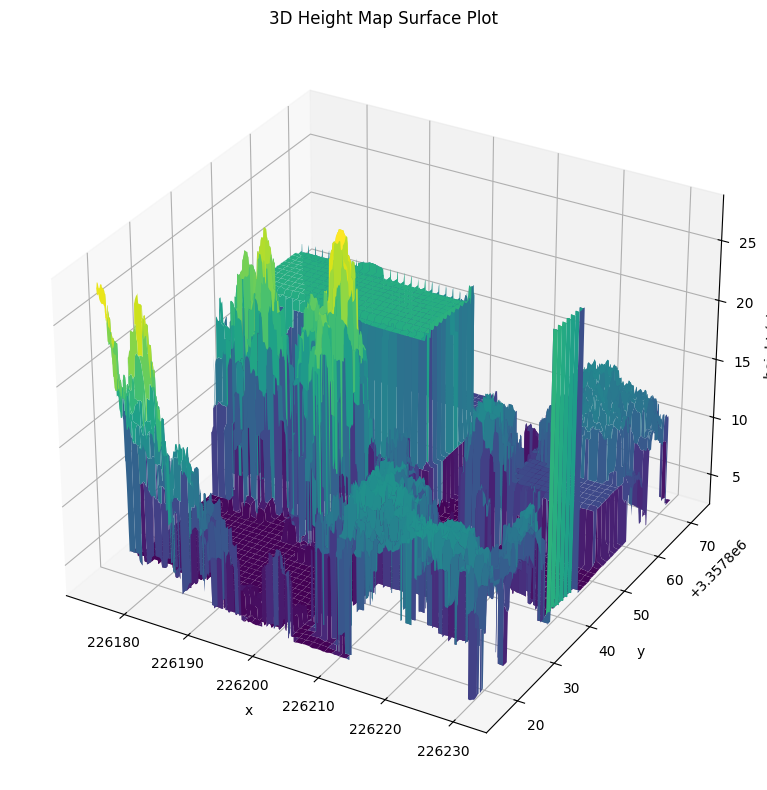

In [26]:
def plot_height_surface(x1=6000, x2=6500, y1=5000, y2=5500):
    # Plot the 3D surface
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x_coords[x1:x2, y1:y2], y_coords[x1:x2, y1:y2], height_map[x1:x2, y1:y2], cmap='viridis')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('height (z)')
    plt.title('3D Height Map Surface Plot')
    plt.tight_layout()
    plt.show()

plot_height_surface(6000, 6700, 5000, 5700)